# This notebook compares the chronic freezing of WT and SERT het mice
* 08/23 Refactored to work with sleep repo

In [1]:
!git clone https://github.com/GergelyTuri/sleep.git
%cd sleep
!pip install .

Cloning into 'sleep'...
remote: Enumerating objects: 273, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 273 (delta 15), reused 20 (delta 8), pack-reused 242
Receiving objects: 100% (273/273), 1.08 MiB | 12.60 MiB/s, done.
Resolving deltas: 100% (141/141), done.
/content/sleep
Processing /content/sleep
  Preparing metadata (setup.py) ... done
  Created wheel for sleep: filename=sleep-0.1-py3-none-any.whl size=1000 sha256=b8b397b02a48a9ad1b735abfdc2051766a0fff51ba9d171b32dbcadfdf720fd4
  Stored in directory: /tmp/pip-ephem-wheel-cache-q3lvz8b_/wheels/10/eb/42/5281370ac4a2d7b033087761ebaa8f968a9ef5108cbc009a46
Successfully built sleep


In [3]:
from datetime import date
from os.path import join
import matplotlib.pyplot as plt

from numpy import NaN
import pandas as pd
import seaborn as sns

from sleep.base import core

sns.set_context('paper', font_scale=0.85)

%matplotlib inline

In [4]:
dr = core.GoogleDrive()
gdrive  = dr.mount_drive()

save_dir = '/gdrive/Shareddrives/Turi_lab/Data/PTSD_project/!analysis/saveFolder/R21_NCE_08_2023'

Mounted at /gdrive


In [6]:
data = dr.load_spreadsheet_data('all_cohorts_freezing_FINAL')
data = data.copy()
data.replace('NA', NaN, inplace=True)
data[['freezing']] = data[['freezing']].apply(pd.to_numeric)
data = data[(data['els']=='n') &
            (data['psilocybin']=='n')]
data['cohort_id'] = data['cohort']+'_'+data['id']
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1245 entries, 1 to 1828
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   freezing           1240 non-null   float64
 1   genotype           1245 non-null   object 
 2   id                 1245 non-null   object 
 3   day                1245 non-null   object 
 4   condition          1245 non-null   object 
 5   sex                1245 non-null   object 
 6   cohort             1245 non-null   object 
 7   exposure_mins      1240 non-null   object 
 8   analyzed_duration  1240 non-null   object 
 9   date               1176 non-null   object 
 10  time               1176 non-null   object 
 11  els                1245 non-null   object 
 12  psilocybin         1245 non-null   object 
 13  cohort_id          1245 non-null   object 
dtypes: float64(1), object(13)
memory usage: 145.9+ KB


In [ ]:
# worksheet = gc.open('all_cohorts_freezing_FINAL').sheet1
# data = worksheet.get_all_values()
# df = pd.DataFrame.from_records(data)
# df.columns = df.iloc[0]
# df.drop(df.index[0], inplace =True)
# df['freezing'] = df['freezing'].replace('NA', NaN)
# dfc = df.copy()
# dfc.loc[:, 'freezing'] = df.loc[:, 'freezing'].apply(pd.to_numeric)

# dfc['cohort_id'] = dfc['cohort']+'_'+dfc['id']
# dfc

In [7]:
# Cohorts where i got sert_het mice
data.loc[data['genotype'] == 'sert_het', 'cohort'].unique()

array(['ptsd1', 'ptsd8', 'ptsd10', 'ptsd12'], dtype=object)

Selecting control vs. SERT-het non-ELS mice

In [12]:
cohort_list = ['ptsd2','ptsd3', 'ptsd4', 'ptsd5', 'ptsd6','ptsd8', 'ptsd9',
               'ptsd10', 'els1', 'ptsd12']
day_list = ['sefla','seflb','recall1', 'recall2', 'recall3',
            'recall4', 'recall5']
ctrl_sert_df = data[(data['cohort'].isin(cohort_list)) &
                              (data['day'].isin(day_list))]

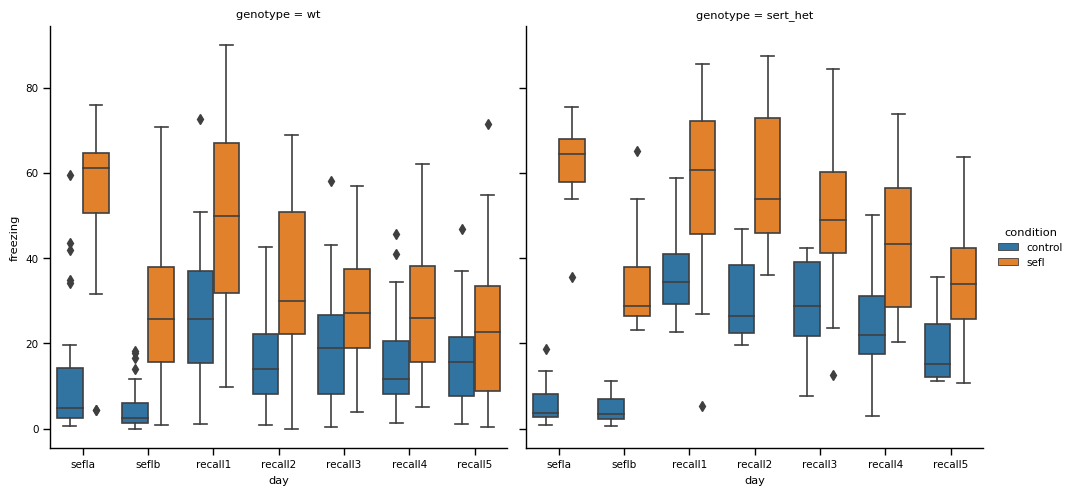

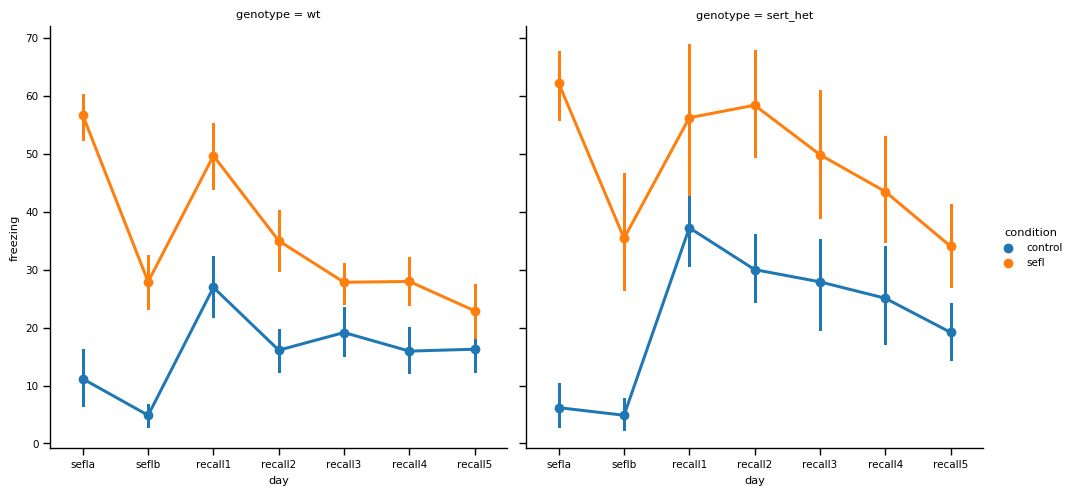

In [13]:
c_sefl, c_wt, sefl_sert, sefl_wt = ctrl_sert_df.groupby(['condition', 'genotype'])['cohort_id'].nunique()
g = sns.catplot(data=ctrl_sert_df, y='freezing', x='day', hue='condition',
                col='genotype', kind='box', order=['sefla','seflb','recall1', 'recall2', 'recall3',
            'recall4', 'recall5'])
g = sns.catplot(data=ctrl_sert_df, y='freezing', x='day', hue='condition',
                col='genotype', kind='point', order=['sefla','seflb','recall1', 'recall2', 'recall3',
            'recall4', 'recall5'])

In [14]:
ctrl_sert_df.groupby(['condition', 'genotype'])['cohort_id'].nunique()

condition  genotype
control    sert_het    10
           wt          35
sefl       sert_het    12
           wt          52
Name: cohort_id, dtype: int64

<ipython-input-19-f552b046b2ff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ctrl_sert_df['day'] = pd.Categorical(ctrl_sert_df['day'],


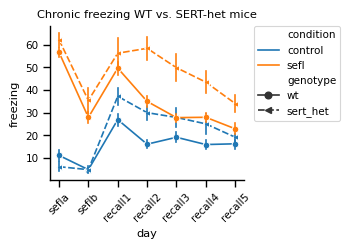

In [19]:
fig = plt.figure(figsize=(2.5,2))
ctrl_sert_df['day'] = pd.Categorical(ctrl_sert_df['day'],
                                     categories=['sefla','seflb','recall1',
                                                 'recall2', 'recall3','recall4',
                                                 'recall5'],
                                     ordered=True)
g = sns.lineplot(data=ctrl_sert_df, y='freezing', x='day', hue='condition',
                style='genotype', markers=['o', '<'],
                legend=True, errorbar='se', err_style='bars')
plt.title('Chronic freezing WT vs. SERT-het mice')
plt.setp(g.get_xticklabels(), rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()
fig.savefig(join(save_dir, 'Chronic_freezing_wt_vs_sert.png'),
            transparent=True,  dpi=300, bbox_inches='tight')